# Software Coaching for Python
# Week 4: Text Data Processing - Homework

Instructor: Kang-Pyo Lee

In [1]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/Shared drives/PythonCoaching_2023Summer"
my_folder = "ljw33083418"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Mounted at /content/drive


In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{classdata_folder}/timeline_cnnbrk.csv", sep="\t")
df

,status_id,created_at,text,retweet_count,favorite_count,is_retweet,retweet_created_at
0,1312243714585235457,Sat Oct 03 04:10:56 +0000 2020,"President Donald Trump's campaign manager Bill Stepien has tested positive for coronavirus, according to a senior o… https://t.co/piwok6WXpA",1050,3946,0,NaN
1,1312217447752237056,Sat Oct 03 02:26:34 +0000 2020,Former White House adviser Kellyanne Conway says she has tested positive for Covid-19. She attended a Rose Garden e… https://t.co/DzHyaaO7Cj,2287,7232,0,NaN
2,1312189828247691265,Sat Oct 03 00:36:49 +0000 2020,Sen. Thom Tillis says he has tested positive for Covid-19. He's the second member of the Senate Judiciary Committee… https://t.co/J3cnZUTEjp,501,1559,0,NaN
3,1312188613015203842,Sat Oct 03 00:31:59 +0000 2020,"After Joe Biden's campaign said it would pull negative ads following President Trump's Covid-19 diagnosis, the Pres… https://t.co/hArgCeKRzC",2831,5992,0,NaN
4,1312161028923244545,Fri Oct 02 22:42:22 +0000 2020,"President Trump has landed on Marine One at Walter Reed medical center, where he will be hospitalized for the next… https://t.co/Btb0FBkJLW",249,841,0,NaN
...,...,...,...,...,...,...,...
3195,1231426815996170243,Sun Feb 23 03:53:26 +0000 2020,Science Channel star Mad Mike Hughes died Saturday during an attempt to launch his homemade rocket… https://t.co/ezI1BUHstT,345,961,0,NaN
3196,1231402873617108992,Sun Feb 23 02:18:18 +0000 2020,"A person was killed in New Orleans when they were hit by a float during the Krewe of Endymion parade, the city says… https://t.co/wC9pSiSqTv",194,345,0,NaN
3197,1231385843723636739,Sun Feb 23 01:10:37 +0000 2020,"Sen. Bernie Sanders will win a decisive victory in Nevada's Democratic caucuses, CNN projects, solidifying his posi… https://t.co/Wk2nFjEiOw",321,2058,0,NaN
3198,1231338606863601668,Sat Feb 22 22:02:55 +0000 2020,"Three people were killed and 18 injured after a bus rolled over on Interstate 15 near Fallbrook, California, north… https://t.co/UHqTVpV7Vm",97,305,0,NaN


We need to explicitly convert the types of the `text` column to string, so we ensure that they are strings.

In [3]:
df.text = df.text.astype(str)

pandas.Series.astype: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html

In [4]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

from nltk.util import ngrams
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1\. Add two new columns `sentences` and `num_sentences` to `df`, such that
- each value in the `sentences` column contains a list of sentences identified from the `text` column value
- and each value in the `num_sentences` column contains the number of identified sentences.

In [5]:
# Your answer here
df["sentences"] = df.text.apply(lambda x: nltk.sent_tokenize(x))
df["num_sentences"] = df.sentences.apply(lambda x: len(x))

In [6]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "sentences", "num_sentences"]]

,text,sentences,num_sentences
0,"President Donald Trump's campaign manager Bill Stepien has tested positive for coronavirus, according to a senior o… https://t.co/piwok6WXpA","[President Donald Trump's campaign manager Bill Stepien has tested positive for coronavirus, according to a senior o… https://t.co/piwok6WXpA]",1
1,Former White House adviser Kellyanne Conway says she has tested positive for Covid-19. She attended a Rose Garden e… https://t.co/DzHyaaO7Cj,"[Former White House adviser Kellyanne Conway says she has tested positive for Covid-19., She attended a Rose Garden e… https://t.co/DzHyaaO7Cj]",2
2,Sen. Thom Tillis says he has tested positive for Covid-19. He's the second member of the Senate Judiciary Committee… https://t.co/J3cnZUTEjp,"[Sen. Thom Tillis says he has tested positive for Covid-19., He's the second member of the Senate Judiciary Committee… https://t.co/J3cnZUTEjp]",2
3,"After Joe Biden's campaign said it would pull negative ads following President Trump's Covid-19 diagnosis, the Pres… https://t.co/hArgCeKRzC","[After Joe Biden's campaign said it would pull negative ads following President Trump's Covid-19 diagnosis, the Pres… https://t.co/hArgCeKRzC]",1
4,"President Trump has landed on Marine One at Walter Reed medical center, where he will be hospitalized for the next… https://t.co/Btb0FBkJLW","[President Trump has landed on Marine One at Walter Reed medical center, where he will be hospitalized for the next… https://t.co/Btb0FBkJLW]",1
...,...,...,...
3195,Science Channel star Mad Mike Hughes died Saturday during an attempt to launch his homemade rocket… https://t.co/ezI1BUHstT,[Science Channel star Mad Mike Hughes died Saturday during an attempt to launch his homemade rocket… https://t.co/ezI1BUHstT],1
3196,"A person was killed in New Orleans when they were hit by a float during the Krewe of Endymion parade, the city says… https://t.co/wC9pSiSqTv","[A person was killed in New Orleans when they were hit by a float during the Krewe of Endymion parade, the city says… https://t.co/wC9pSiSqTv]",1
3197,"Sen. Bernie Sanders will win a decisive victory in Nevada's Democratic caucuses, CNN projects, solidifying his posi… https://t.co/Wk2nFjEiOw","[Sen. Bernie Sanders will win a decisive victory in Nevada's Democratic caucuses, CNN projects, solidifying his posi… https://t.co/Wk2nFjEiOw]",1
3198,"Three people were killed and 18 injured after a bus rolled over on Interstate 15 near Fallbrook, California, north… https://t.co/UHqTVpV7Vm","[Three people were killed and 18 injured after a bus rolled over on Interstate 15 near Fallbrook, California, north… https://t.co/UHqTVpV7Vm]",1


2\. Add two new columns `words` and `num_words` to `df`, such that
- each value in the `words` column contains a list of words identified from the `text` column value
- and each value in the `num_words` column contains the number of identified words.

In [9]:
# Your answer here

# words: text column에서 list of words 뽑기
# num_words: words의 개수

df["words"] = df.text.apply(lambda x: nltk.word_tokenize(x))
df["num_words"] = df.words.apply(lambda x: len(x))

In [10]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "words", "num_words"]]

,text,words,num_words
0,"President Donald Trump's campaign manager Bill Stepien has tested positive for coronavirus, according to a senior o… https://t.co/piwok6WXpA","[President, Donald, Trump, 's, campaign, manager, Bill, Stepien, has, tested, positive, for, coronavirus, ,, according, to, a, senior, o…, https, ...",22
1,Former White House adviser Kellyanne Conway says she has tested positive for Covid-19. She attended a Rose Garden e… https://t.co/DzHyaaO7Cj,"[Former, White, House, adviser, Kellyanne, Conway, says, she, has, tested, positive, for, Covid-19, ., She, attended, a, Rose, Garden, e…, https, ...",23
2,Sen. Thom Tillis says he has tested positive for Covid-19. He's the second member of the Senate Judiciary Committee… https://t.co/J3cnZUTEjp,"[Sen., Thom, Tillis, says, he, has, tested, positive, for, Covid-19, ., He, 's, the, second, member, of, the, Senate, Judiciary, Committee…, https...",24
3,"After Joe Biden's campaign said it would pull negative ads following President Trump's Covid-19 diagnosis, the Pres… https://t.co/hArgCeKRzC","[After, Joe, Biden, 's, campaign, said, it, would, pull, negative, ads, following, President, Trump, 's, Covid-19, diagnosis, ,, the, Pres…, https...",23
4,"President Trump has landed on Marine One at Walter Reed medical center, where he will be hospitalized for the next… https://t.co/Btb0FBkJLW","[President, Trump, has, landed, on, Marine, One, at, Walter, Reed, medical, center, ,, where, he, will, be, hospitalized, for, the, next…, https, ...",24
...,...,...,...
3195,Science Channel star Mad Mike Hughes died Saturday during an attempt to launch his homemade rocket… https://t.co/ezI1BUHstT,"[Science, Channel, star, Mad, Mike, Hughes, died, Saturday, during, an, attempt, to, launch, his, homemade, rocket…, https, :, //t.co/ezI1BUHstT]",19
3196,"A person was killed in New Orleans when they were hit by a float during the Krewe of Endymion parade, the city says… https://t.co/wC9pSiSqTv","[A, person, was, killed, in, New, Orleans, when, they, were, hit, by, a, float, during, the, Krewe, of, Endymion, parade, ,, the, city, says…, htt...",27
3197,"Sen. Bernie Sanders will win a decisive victory in Nevada's Democratic caucuses, CNN projects, solidifying his posi… https://t.co/Wk2nFjEiOw","[Sen., Bernie, Sanders, will, win, a, decisive, victory, in, Nevada, 's, Democratic, caucuses, ,, CNN, projects, ,, solidifying, his, posi…, https...",23
3198,"Three people were killed and 18 injured after a bus rolled over on Interstate 15 near Fallbrook, California, north… https://t.co/UHqTVpV7Vm","[Three, people, were, killed, and, 18, injured, after, a, bus, rolled, over, on, Interstate, 15, near, Fallbrook, ,, California, ,, north…, https,...",24


3\. Add a new column `tagged_words` to `df`, such that each value in the column contains a list of tuples with words and their part-of-speech tags.

In [11]:
# Your answer here

# tagged_words: (단어, 해당 단어의 품사) 형식의 list

df['tagged_words'] = df.words.apply(lambda x: nltk.pos_tag(x))

In [12]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "tagged_words"]]

,words,tagged_words
0,"[President, Donald, Trump, 's, campaign, manager, Bill, Stepien, has, tested, positive, for, coronavirus, ,, according, to, a, senior, o…, https, ...","[(President, NNP), (Donald, NNP), (Trump, NNP), ('s, POS), (campaign, NN), (manager, NN), (Bill, NNP), (Stepien, NNP), (has, VBZ), (tested, VBN), ..."
1,"[Former, White, House, adviser, Kellyanne, Conway, says, she, has, tested, positive, for, Covid-19, ., She, attended, a, Rose, Garden, e…, https, ...","[(Former, NNP), (White, NNP), (House, NNP), (adviser, NN), (Kellyanne, NNP), (Conway, NNP), (says, VBZ), (she, PRP), (has, VBZ), (tested, VBN), (p..."
2,"[Sen., Thom, Tillis, says, he, has, tested, positive, for, Covid-19, ., He, 's, the, second, member, of, the, Senate, Judiciary, Committee…, https...","[(Sen., NNP), (Thom, NNP), (Tillis, NNP), (says, VBZ), (he, PRP), (has, VBZ), (tested, VBN), (positive, JJ), (for, IN), (Covid-19, NNP), (., .), (..."
3,"[After, Joe, Biden, 's, campaign, said, it, would, pull, negative, ads, following, President, Trump, 's, Covid-19, diagnosis, ,, the, Pres…, https...","[(After, IN), (Joe, NNP), (Biden, NNP), ('s, POS), (campaign, NN), (said, VBD), (it, PRP), (would, MD), (pull, VB), (negative, JJ), (ads, NNS), (f..."
4,"[President, Trump, has, landed, on, Marine, One, at, Walter, Reed, medical, center, ,, where, he, will, be, hospitalized, for, the, next…, https, ...","[(President, NNP), (Trump, NNP), (has, VBZ), (landed, VBN), (on, IN), (Marine, NNP), (One, NNP), (at, IN), (Walter, NNP), (Reed, NNP), (medical, J..."
...,...,...
3195,"[Science, Channel, star, Mad, Mike, Hughes, died, Saturday, during, an, attempt, to, launch, his, homemade, rocket…, https, :, //t.co/ezI1BUHstT]","[(Science, NNP), (Channel, NNP), (star, NN), (Mad, NNP), (Mike, NNP), (Hughes, NNP), (died, VBD), (Saturday, NNP), (during, IN), (an, DT), (attemp..."
3196,"[A, person, was, killed, in, New, Orleans, when, they, were, hit, by, a, float, during, the, Krewe, of, Endymion, parade, ,, the, city, says…, htt...","[(A, DT), (person, NN), (was, VBD), (killed, VBN), (in, IN), (New, NNP), (Orleans, NNP), (when, WRB), (they, PRP), (were, VBD), (hit, VBN), (by, I..."
3197,"[Sen., Bernie, Sanders, will, win, a, decisive, victory, in, Nevada, 's, Democratic, caucuses, ,, CNN, projects, ,, solidifying, his, posi…, https...","[(Sen., NNP), (Bernie, NNP), (Sanders, NNP), (will, MD), (win, VB), (a, DT), (decisive, JJ), (victory, NN), (in, IN), (Nevada, NNP), ('s, POS), (D..."
3198,"[Three, people, were, killed, and, 18, injured, after, a, bus, rolled, over, on, Interstate, 15, near, Fallbrook, ,, California, ,, north…, https,...","[(Three, CD), (people, NNS), (were, VBD), (killed, VBN), (and, CC), (18, CD), (injured, VBN), (after, IN), (a, DT), (bus, NN), (rolled, VBN), (ove..."


4\. Add a new column `nouns` to `df`, such that each value in the column contains a list of nouns in the `text` column value. Noun tags start with 'NN'.

In [17]:
# Your answer here

# nouns: noun tag(NN로 시작)가 달린 words의 list

def get_noun(li):
  return [word for word, tag in li if tag.startswith("NN")]

df['nouns'] = df.tagged_words.apply(get_noun)

In [18]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["tagged_words", "nouns"]]

,tagged_words,nouns
0,"[(President, NNP), (Donald, NNP), (Trump, NNP), ('s, POS), (campaign, NN), (manager, NN), (Bill, NNP), (Stepien, NNP), (has, VBZ), (tested, VBN), ...","[President, Donald, Trump, campaign, manager, Bill, Stepien, coronavirus, o…, https, //t.co/piwok6WXpA]"
1,"[(Former, NNP), (White, NNP), (House, NNP), (adviser, NN), (Kellyanne, NNP), (Conway, NNP), (says, VBZ), (she, PRP), (has, VBZ), (tested, VBN), (p...","[Former, White, House, adviser, Kellyanne, Conway, Covid-19, Rose, Garden, https, //t.co/DzHyaaO7Cj]"
2,"[(Sen., NNP), (Thom, NNP), (Tillis, NNP), (says, VBZ), (he, PRP), (has, VBZ), (tested, VBN), (positive, JJ), (for, IN), (Covid-19, NNP), (., .), (...","[Sen., Thom, Tillis, Covid-19, member, Senate, Judiciary, Committee…, https, //t.co/J3cnZUTEjp]"
3,"[(After, IN), (Joe, NNP), (Biden, NNP), ('s, POS), (campaign, NN), (said, VBD), (it, PRP), (would, MD), (pull, VB), (negative, JJ), (ads, NNS), (f...","[Joe, Biden, campaign, ads, President, Trump, diagnosis, Pres…, https, //t.co/hArgCeKRzC]"
4,"[(President, NNP), (Trump, NNP), (has, VBZ), (landed, VBN), (on, IN), (Marine, NNP), (One, NNP), (at, IN), (Walter, NNP), (Reed, NNP), (medical, J...","[President, Trump, Marine, One, Walter, Reed, center, https, //t.co/Btb0FBkJLW]"
...,...,...
3195,"[(Science, NNP), (Channel, NNP), (star, NN), (Mad, NNP), (Mike, NNP), (Hughes, NNP), (died, VBD), (Saturday, NNP), (during, IN), (an, DT), (attemp...","[Science, Channel, star, Mad, Mike, Hughes, Saturday, attempt, homemade, rocket…, https, //t.co/ezI1BUHstT]"
3196,"[(A, DT), (person, NN), (was, VBD), (killed, VBN), (in, IN), (New, NNP), (Orleans, NNP), (when, WRB), (they, PRP), (were, VBD), (hit, VBN), (by, I...","[person, New, Orleans, float, Krewe, Endymion, parade, city, says…, https, //t.co/wC9pSiSqTv]"
3197,"[(Sen., NNP), (Bernie, NNP), (Sanders, NNP), (will, MD), (win, VB), (a, DT), (decisive, JJ), (victory, NN), (in, IN), (Nevada, NNP), ('s, POS), (D...","[Sen., Bernie, Sanders, victory, Nevada, caucuses, CNN, projects, posi…, https, //t.co/Wk2nFjEiOw]"
3198,"[(Three, CD), (people, NNS), (were, VBD), (killed, VBN), (and, CC), (18, CD), (injured, VBN), (after, IN), (a, DT), (bus, NN), (rolled, VBN), (ove...","[people, bus, Interstate, Fallbrook, California, https, //t.co/UHqTVpV7Vm]"


5\. Add a new column `stems` to `df`, such that each value in the column contains a list of stems in the `text` column value. Use SnowballStemmer for stemming.

In [20]:
# Your answer here

# stems: words 칼럼에서 stems 뽑기

stemmer = nltk.stem.SnowballStemmer("english")
def get_stem(li):
  return [stemmer.stem(word) for word in li]
df['stems'] = df.words.apply(get_stem)

In [21]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "stems"]]

,words,stems
0,"[President, Donald, Trump, 's, campaign, manager, Bill, Stepien, has, tested, positive, for, coronavirus, ,, according, to, a, senior, o…, https, ...","[presid, donald, trump, 's, campaign, manag, bill, stepien, has, test, posit, for, coronavirus, ,, accord, to, a, senior, o…, https, :, //t.co/piw..."
1,"[Former, White, House, adviser, Kellyanne, Conway, says, she, has, tested, positive, for, Covid-19, ., She, attended, a, Rose, Garden, e…, https, ...","[former, white, hous, advis, kellyann, conway, say, she, has, test, posit, for, covid-19, ., she, attend, a, rose, garden, e…, https, :, //t.co/dz..."
2,"[Sen., Thom, Tillis, says, he, has, tested, positive, for, Covid-19, ., He, 's, the, second, member, of, the, Senate, Judiciary, Committee…, https...","[sen., thom, tilli, say, he, has, test, posit, for, covid-19, ., he, 's, the, second, member, of, the, senat, judiciari, committee…, https, :, //t..."
3,"[After, Joe, Biden, 's, campaign, said, it, would, pull, negative, ads, following, President, Trump, 's, Covid-19, diagnosis, ,, the, Pres…, https...","[after, joe, biden, 's, campaign, said, it, would, pull, negat, ad, follow, presid, trump, 's, covid-19, diagnosi, ,, the, pres…, https, :, //t.co..."
4,"[President, Trump, has, landed, on, Marine, One, at, Walter, Reed, medical, center, ,, where, he, will, be, hospitalized, for, the, next…, https, ...","[presid, trump, has, land, on, marin, one, at, walter, reed, medic, center, ,, where, he, will, be, hospit, for, the, next…, https, :, //t.co/btb0..."
...,...,...
3195,"[Science, Channel, star, Mad, Mike, Hughes, died, Saturday, during, an, attempt, to, launch, his, homemade, rocket…, https, :, //t.co/ezI1BUHstT]","[scienc, channel, star, mad, mike, hugh, die, saturday, dure, an, attempt, to, launch, his, homemad, rocket…, https, :, //t.co/ezi1buhstt]"
3196,"[A, person, was, killed, in, New, Orleans, when, they, were, hit, by, a, float, during, the, Krewe, of, Endymion, parade, ,, the, city, says…, htt...","[a, person, was, kill, in, new, orlean, when, they, were, hit, by, a, float, dure, the, krew, of, endymion, parad, ,, the, citi, says…, https, :, ..."
3197,"[Sen., Bernie, Sanders, will, win, a, decisive, victory, in, Nevada, 's, Democratic, caucuses, ,, CNN, projects, ,, solidifying, his, posi…, https...","[sen., berni, sander, will, win, a, decis, victori, in, nevada, 's, democrat, caucus, ,, cnn, project, ,, solidifi, his, posi…, https, :, //t.co/w..."
3198,"[Three, people, were, killed, and, 18, injured, after, a, bus, rolled, over, on, Interstate, 15, near, Fallbrook, ,, California, ,, north…, https,...","[three, peopl, were, kill, and, 18, injur, after, a, bus, roll, over, on, interst, 15, near, fallbrook, ,, california, ,, north…, https, :, //t.co..."


6\. Add a new column `bigrams` to `df`, such that each value in the column contains a list of bigram strings in the `text` column value.

In [24]:
# Your answer here

# bigrams: words column에서 bigram strings (2개의 단어) 뽑기

from nltk.util import ngrams

def get_bigram(li):
  return [" ".join(gram) for gram in ngrams(li, 2)]
df['bigrams'] = df.words.apply(get_bigram)

In [25]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "bigrams"]]

,words,bigrams
0,"[President, Donald, Trump, 's, campaign, manager, Bill, Stepien, has, tested, positive, for, coronavirus, ,, according, to, a, senior, o…, https, ...","[President Donald, Donald Trump, Trump 's, 's campaign, campaign manager, manager Bill, Bill Stepien, Stepien has, has tested, tested positive, po..."
1,"[Former, White, House, adviser, Kellyanne, Conway, says, she, has, tested, positive, for, Covid-19, ., She, attended, a, Rose, Garden, e…, https, ...","[Former White, White House, House adviser, adviser Kellyanne, Kellyanne Conway, Conway says, says she, she has, has tested, tested positive, posit..."
2,"[Sen., Thom, Tillis, says, he, has, tested, positive, for, Covid-19, ., He, 's, the, second, member, of, the, Senate, Judiciary, Committee…, https...","[Sen. Thom, Thom Tillis, Tillis says, says he, he has, has tested, tested positive, positive for, for Covid-19, Covid-19 ., . He, He 's, 's the, t..."
3,"[After, Joe, Biden, 's, campaign, said, it, would, pull, negative, ads, following, President, Trump, 's, Covid-19, diagnosis, ,, the, Pres…, https...","[After Joe, Joe Biden, Biden 's, 's campaign, campaign said, said it, it would, would pull, pull negative, negative ads, ads following, following ..."
4,"[President, Trump, has, landed, on, Marine, One, at, Walter, Reed, medical, center, ,, where, he, will, be, hospitalized, for, the, next…, https, ...","[President Trump, Trump has, has landed, landed on, on Marine, Marine One, One at, at Walter, Walter Reed, Reed medical, medical center, center ,,..."
...,...,...
3195,"[Science, Channel, star, Mad, Mike, Hughes, died, Saturday, during, an, attempt, to, launch, his, homemade, rocket…, https, :, //t.co/ezI1BUHstT]","[Science Channel, Channel star, star Mad, Mad Mike, Mike Hughes, Hughes died, died Saturday, Saturday during, during an, an attempt, attempt to, t..."
3196,"[A, person, was, killed, in, New, Orleans, when, they, were, hit, by, a, float, during, the, Krewe, of, Endymion, parade, ,, the, city, says…, htt...","[A person, person was, was killed, killed in, in New, New Orleans, Orleans when, when they, they were, were hit, hit by, by a, a float, float duri..."
3197,"[Sen., Bernie, Sanders, will, win, a, decisive, victory, in, Nevada, 's, Democratic, caucuses, ,, CNN, projects, ,, solidifying, his, posi…, https...","[Sen. Bernie, Bernie Sanders, Sanders will, will win, win a, a decisive, decisive victory, victory in, in Nevada, Nevada 's, 's Democratic, Democr..."
3198,"[Three, people, were, killed, and, 18, injured, after, a, bus, rolled, over, on, Interstate, 15, near, Fallbrook, ,, California, ,, north…, https,...","[Three people, people were, were killed, killed and, and 18, 18 injured, injured after, after a, a bus, bus rolled, rolled over, over on, on Inter..."


7\. Add two new columns `polarity` and `subjectivity` to `df`, such that
- each value in the `polarity` column contains the polarity score of the `text` column value
- and each value in the `subjectivity` column contains the subjectivity score of the `text` column value.

In [28]:
# Your answer here

# polarity: text column에 대한 polarity score
# subjectivity: text column에 대한 subjectivity score

df["polarity"] = df.text.apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df.text.apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [29]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "polarity", "subjectivity"]]

,text,polarity,subjectivity
0,"President Donald Trump's campaign manager Bill Stepien has tested positive for coronavirus, according to a senior o… https://t.co/piwok6WXpA",0.227273,0.545455
1,Former White House adviser Kellyanne Conway says she has tested positive for Covid-19. She attended a Rose Garden e… https://t.co/DzHyaaO7Cj,0.206818,0.373864
2,Sen. Thom Tillis says he has tested positive for Covid-19. He's the second member of the Senate Judiciary Committee… https://t.co/J3cnZUTEjp,0.113636,0.272727
3,"After Joe Biden's campaign said it would pull negative ads following President Trump's Covid-19 diagnosis, the Pres… https://t.co/hArgCeKRzC",-0.150000,0.250000
4,"President Trump has landed on Marine One at Walter Reed medical center, where he will be hospitalized for the next… https://t.co/Btb0FBkJLW",-0.050000,0.050000
...,...,...,...
3195,Science Channel star Mad Mike Hughes died Saturday during an attempt to launch his homemade rocket… https://t.co/ezI1BUHstT,-0.625000,1.000000
3196,"A person was killed in New Orleans when they were hit by a float during the Krewe of Endymion parade, the city says… https://t.co/wC9pSiSqTv",-0.104545,0.229293
3197,"Sen. Bernie Sanders will win a decisive victory in Nevada's Democratic caucuses, CNN projects, solidifying his posi… https://t.co/Wk2nFjEiOw",0.800000,0.400000
3198,"Three people were killed and 18 injured after a bus rolled over on Interstate 15 near Fallbrook, California, north… https://t.co/UHqTVpV7Vm",-0.050000,0.200000


8\. List the top-50 most common words in the `text` column along with their frequencies, considering only the global English stopwords. You may reuse the `get_counter` function you have used in class.

In [30]:
# Your answer here
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()

    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)

    return counter

global_stopwords = nltk.corpus.stopwords.words("english")
counter1 = get_counter(df, global_stopwords)
counter1.most_common(50)

[(':', 3200),
 ('https', 2929),
 (',', 1516),
 ("'s", 669),
 ('.', 559),
 ('coronavirus', 509),
 ('says', 461),
 ('us', 456),
 ('trump', 394),
 ('rt', 348),
 ('@', 348),
 ('president', 341),
 ('new', 336),
 ('cnnpolitics', 271),
 ('people', 215),
 ('state', 193),
 ('police', 176),
 ('covid-19', 174),
 ('york', 161),
 ('house', 156),
 ('former', 145),
 ('two', 130),
 ('died', 128),
 ('first', 128),
 ('biden', 115),
 ('cases', 110),
 ('positive', 107),
 ('court', 107),
 ('gov', 107),
 ('federal', 106),
 ('joe', 104),
 ('tested', 100),
 ('follow', 100),
 ('least', 100),
 ('city', 97),
 ('department', 97),
 ('white', 96),
 ('according', 95),
 ('national', 92),
 ('cnn', 92),
 ('live', 91),
 ('one', 86),
 ('health', 86),
 ('week', 85),
 ('three', 85),
 ('say', 84),
 ('…', 83),
 ('supreme', 77),
 ('california', 74),
 ('$', 73)]

9\. Examine the 50 most common words from question 8 and define your own local stopwords in a list named `local_stopwords`. Then, list the top-50 most common words and their frequencies, this time considering both the global and local stopwords.

In [34]:
# Your answer here

# own local stopwords를 정의하고 top-50 most common words와 frequencies를 뽑는데, 이번엔 global, local stopwords 둘 다 고려하도록

local_stopwords = [':', 'https', ',', "'s", '.', '@', '…', '$', '%', "n't", 'rt']
counter2 = get_counter(df, global_stopwords+local_stopwords)
counter2.most_common(50)

[('coronavirus', 509),
 ('says', 461),
 ('us', 456),
 ('trump', 394),
 ('president', 341),
 ('new', 336),
 ('cnnpolitics', 271),
 ('people', 215),
 ('state', 193),
 ('police', 176),
 ('covid-19', 174),
 ('york', 161),
 ('house', 156),
 ('former', 145),
 ('two', 130),
 ('died', 128),
 ('first', 128),
 ('biden', 115),
 ('cases', 110),
 ('positive', 107),
 ('court', 107),
 ('gov', 107),
 ('federal', 106),
 ('joe', 104),
 ('tested', 100),
 ('follow', 100),
 ('least', 100),
 ('city', 97),
 ('department', 97),
 ('white', 96),
 ('according', 95),
 ('national', 92),
 ('cnn', 92),
 ('live', 91),
 ('one', 86),
 ('health', 86),
 ('week', 85),
 ('three', 85),
 ('say', 84),
 ('supreme', 77),
 ('california', 74),
 ('death', 73),
 ('killed', 72),
 ('officials', 71),
 ('million', 70),
 ('states', 68),
 ('mayor', 67),
 ('democratic', 67),
 ('since', 66),
 ('due', 66)]

10\. Draw a word cloud that visualizes the top-100 most common words. You may use the `draw_wordcloud` function below.

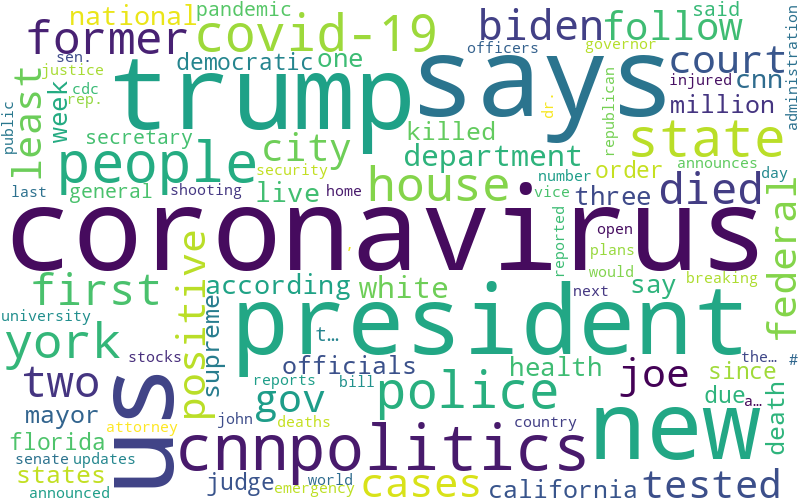

In [36]:
# Your answer here
from IPython.display import Image
from wordcloud import WordCloud

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))

draw_wordcloud(counter2, 'question_10.png')

11\. Select from `df` the rows with the polarity score larger than or equal to 0.7, i.e., strongly positive tweets. List the top-50 most common words in the selected text along with their frequencies, reusing the global and local stopwords defined earlier.

In [40]:
# Your answer here

# 1. polarity score가 0.7 이상인 row (text) 뽑기
# 2. 선택된 text에서 top-50 most common words 뽑기 (global and local stopwords 재사용)

df_positive = df[df.polarity >= 0.7]
counter3 = get_counter(df_positive, global_stopwords+local_stopwords)
counter3.most_common(50)

[('died', 8),
 ('best', 6),
 ('cnnpolitics', 5),
 ('win', 5),
 ('says', 5),
 ('bernie', 5),
 ('sanders', 5),
 ('legendary', 4),
 ('known', 4),
 ('bright', 4),
 ('age', 3),
 ('coronavirus', 3),
 ('president', 3),
 ('great', 3),
 ('successful', 3),
 ('dr.', 3),
 ('congress', 3),
 ('trump', 3),
 ('us', 3),
 ('rick', 3),
 ('director', 3),
 ('sen.', 3),
 ('six', 2),
 ('america', 2),
 ('nomination', 2),
 ('joe', 2),
 ('biden', 2),
 ('actor', 2),
 ('covid-19', 2),
 ('supreme', 2),
 ('court', 2),
 ('records', 2),
 ('street', 2),
 ('decades', 2),
 ('seen', 2),
 ('since', 2),
 ('lost', 2),
 ('show', 2),
 ('role', 2),
 ('unemployment', 2),
 ('singer', 2),
 ('history', 2),
 ('ousted', 2),
 ('vaccine', 2),
 ('pandemic', 2),
 ('democratic', 2),
 ('cnn', 2),
 ('projects', 2),
 ('caucuses', 2),
 ('economy', 2)]

12\. Draw a word cloud that visualizes the top-100 most common words in the strongly positive tweets.

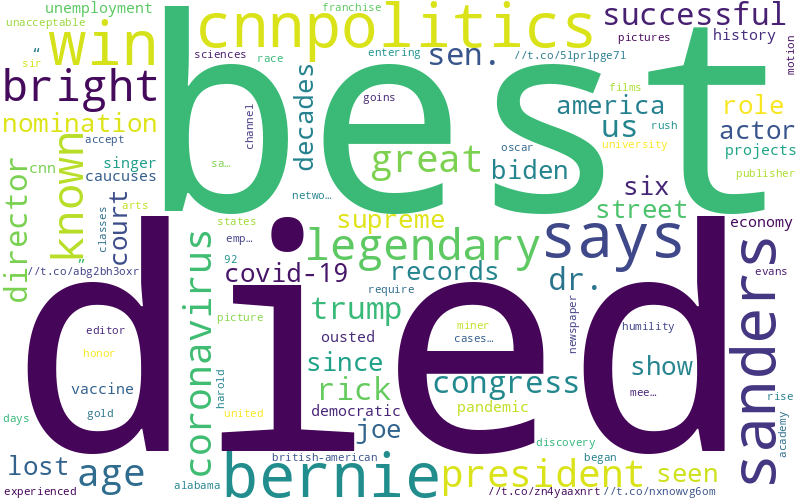

In [41]:
# Your answer here

# positive tweets에서 top-100 most common words에 대해 word cloud 그리기

draw_wordcloud(counter3, 'question_12.png')

13\. Select from `df` the rows with the polarity score larger than or equal to 0.7, i.e., strongly positive tweets. List the top-50 most common <b>adjectives</b> in the selected text along with their frequencies, reusing the global and local stopwords defined earlier.

In [42]:
# Your answer here

# 문제가 중복되어 subjective text들에 대해 구하겠습니다
# 1. subjectivity score가 0.7 이상인 row (text) 뽑기
# 2. 선택된 text에서 top-50 most common words 뽑기 (global and local stopwords 재사용)

df_subjective = df[df.subjectivity >= 0.7]
counter4 = get_counter(df_subjective, global_stopwords+local_stopwords)
counter4.most_common(50)

[('trump', 36),
 ('says', 35),
 ('us', 31),
 ('cnnpolitics', 27),
 ('coronavirus', 27),
 ('president', 22),
 ('covid-19', 17),
 ('cases', 13),
 ('confirmed', 13),
 ('grand', 12),
 ('federal', 11),
 ('court', 11),
 ('guilty', 11),
 ('died', 10),
 ('people', 10),
 ('potential', 10),
 ('jury', 9),
 ('supreme', 9),
 ('the…', 9),
 ('joe', 9),
 ('biden', 9),
 ('a…', 9),
 ('“', 9),
 ('latest', 9),
 ('total', 9),
 ('police', 8),
 ('likely', 8),
 ('one', 8),
 ('would', 8),
 ('states', 8),
 ('house', 8),
 ('shooting', 7),
 ('two', 7),
 ('storm', 7),
 ('since', 7),
 ('make', 7),
 ('dr.', 7),
 ('friday', 6),
 ('said', 6),
 ('justice', 6),
 ('speaker', 6),
 ('pelosi', 6),
 ('judge', 6),
 ('hurricane', 6),
 ('new', 6),
 ('saying', 6),
 ('pandemic', 6),
 ("'", 6),
 ('plead', 6),
 ('three', 6)]

14\. Draw a word cloud that visualizes the top-100 most common adjectives in the strongly positive tweets.

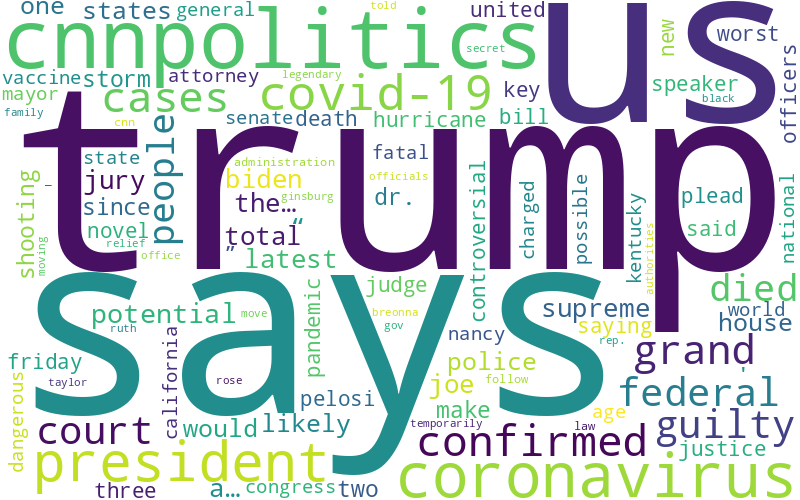

In [43]:
# Your answer here

# subjective tweets에서 top-100 most common words에 대해 word cloud 그리기

draw_wordcloud(counter4, 'question_14.png')